# WeatherPy
----

    Brief analysis:
    Not direct correlation betweem wind speed and latitude.
    Not direct correlation betweem cloudiness and latitude.
    Not direct correlation betweem humidity level and latitude.
    
    However, there is a direct correlation between temperature and latitude, the closer to the equator the warmest it is. This effect has a stronger prescense in the northest hemisphere.

In [59]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# API key
api_key = '5371b7c3b2519d0bca096af0ec5fdee8'

# Incorporated citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/cla/Desktop/UM Data Science/Projects/API---Homework"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

cities


['bredasdorp',
 'dingli',
 'albany',
 'tasiilaq',
 'nabire',
 'yeppoon',
 'ushuaia',
 'port alfred',
 'kapaa',
 'cape town',
 'pevek',
 'sergeyevka',
 'labuhan',
 'hilo',
 'hobart',
 'husavik',
 'axim',
 'kapit',
 'mar del plata',
 'jamestown',
 'mataura',
 'arman',
 'hofn',
 'ayorou',
 'dourados',
 'nova granada',
 'budhlada',
 'acari',
 'guerrero negro',
 'saint george',
 'kysyl-syr',
 'punta arenas',
 'bluff',
 'sobolevo',
 'quang ngai',
 'isangel',
 'quatre cocos',
 'bemidji',
 'vaini',
 'iquique',
 'cidreira',
 'mahebourg',
 'xingyi',
 'regina',
 'taolanaro',
 'aklavik',
 'yellowknife',
 'severo-kurilsk',
 'kurchum',
 'yumen',
 'bardiyah',
 'iranshahr',
 'new norfolk',
 'matara',
 'klaksvik',
 'lagoa',
 'atuona',
 'georgetown',
 'zhuhai',
 'rikitea',
 'kahului',
 'maralal',
 'hermanus',
 'cherskiy',
 'khatanga',
 'oktyabrskoye',
 'makung',
 'illoqqortoormiut',
 'puerto ayora',
 'lushunkou',
 'warqla',
 'xinzhi',
 'bilibino',
 'hamilton',
 'victoria',
 'ballina',
 'umm lajj',
 'liv

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [69]:
record_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass  


Processing record 1 of set 0 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5371b7c3b2519d0bca096af0ec5fdee8
Processing record 2 of set 0 | dingli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5371b7c3b2519d0bca096af0ec5fdee8
Processing record 3 of set 0 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5371b7c3b2519d0bca096af0ec5fdee8
Processing record 4 of set 0 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5371b7c3b2519d0bca096af0ec5fdee8
Processing record 5 of set 0 | nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5371b7c3b2519d0bca096af0ec5fdee8
Processing record 6 of set 0 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5371b7c3b2519d0bca096af0ec5fdee8
Processing record 7 of set 0 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5371b7c3b2519d0bca096af0ec5fdee8
Processing record 8

### Convert Raw Data to DataFrame

In [70]:
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Temp          571
Lat           571
Lng           571
Wind Speed    571
dtype: int64

In [71]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,bredasdorp,79,ZA,1573486350,77,70.00,-34.53,20.04,18.34
1,dingli,4,IN,1573486350,19,73.51,28.39,75.51,6.40
2,albany,90,US,1573486318,74,46.00,42.65,-73.75,8.05
3,tasiilaq,80,GL,1573486158,74,37.40,65.61,-37.64,33.33
4,nabire,100,ID,1573486350,77,72.32,-3.36,135.50,2.01


In [72]:
date =datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

### Plotting the Data


#### Latitude vs. Temperature Plot

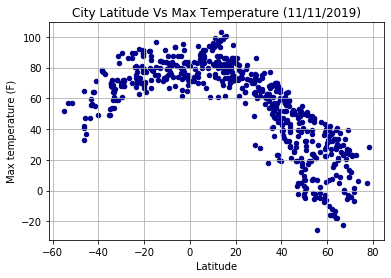

In [76]:
weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("/Users/cla/Desktop/UM Data Science/Projects/API---Homework/latvsmaxtemp.png")

#### Latitude vs. Humidity Plot

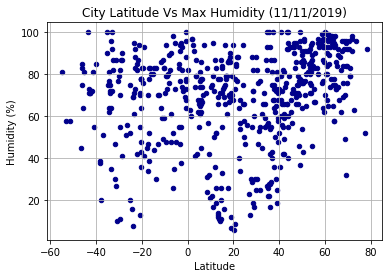

In [75]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("/Users/cla/Desktop/UM Data Science/Projects/API---Homework/latvshum.png")

#### Latitude vs. Cloudiness Plot

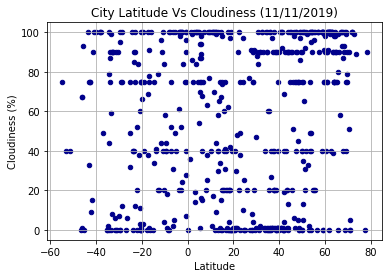

In [77]:
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("/Users/cla/Desktop/UM Data Science/Projects/API---Homework/latvscloud.png")

#### Latitude vs. Wind Speed Plot

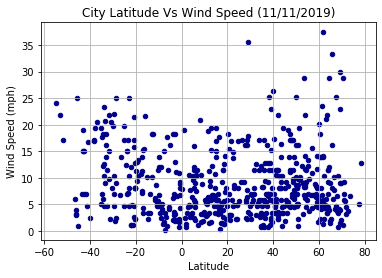

In [78]:
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("/Users/cla/Desktop/UM Data Science/Projects/API---Homework/latvswind.png")